In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [3]:
file = '../myDATA/00-collaboration_df.csv'
df = pd.read_csv(file)
df.iloc[np.random.permutation(len(df))]

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
124509,35180239300,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2014,2014,0,0,1
172715,55956782200,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,2009,2009,0,0,1
98640,22735859600,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2014,2014,0,0,1
92100,16041613300,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,2008,2008,0,0,1
190038,56601224000,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2013,2013,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103788,23469299900,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2017,2017,0,0,1
159992,55543948600,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,2013,2014,0,1,2
52221,7005915207,0,0,0,0,0,0,0,0,0,...,11,11,11,11,15,2011,2018,3,7,4
177758,56114875000,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,2013,2013,0,0,1


In [4]:
YEARS = get_str_years_event()
HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3

In [6]:
# reading dataset
file = '../myDATA/00-collaboration_df.csv'
collaborations_df = pd.read_csv(file)

# iterate over the years columns 
num_colls_by_y = []
for i in range(len(YEARS)-1):
    
    y = YEARS[1:][i]
    
    num_colls_by_y.append(collaborations_df[y].sum())

In [7]:
# return an array with the total number of collaboration for each year
def get_collabs_event():
    
    # reading dataset
    file = '../myDATA/00-collaboration_df.csv'
    collaborations_df = pd.read_csv(file)
    
    # iterate over the years columns 
    num_colls_by_y = []
    for i in range(len(YEARS)-1):
        y = YEARS[1:][i]
        
        # the total number of collaborations in the given year is the sum over the cells in the corresponding column
        num_colls_by_y.append(collaborations_df[y].sum())
    
    num_colls_by_y.insert(0,np.int64(1))
    return num_colls_by_y



# return an array with the total number of collaboration for each year
def get_collabs_eventACTIVE(hs, act, mPubs):
    
    # filtering dataset for active
    file = '../myDATA/00-collaboration_df.csv'
    collaborations_df = pd.read_csv(file)
    collaborations_df = collaborations_df[collaborations_df["max_hole_size"] <= hs]
    collaborations_df = collaborations_df[collaborations_df["activity"] >= act]
    collaborations_df = collaborations_df[collaborations_df["max_hole_size"] >= mPubs]
    
    # iterate over the years columns 
    num_colls_by_y = []
    for i in range(len(YEARS)-1):
        y = YEARS[1:][i]
        # the total number of collaborations in the given year is the sum over the cells in the corresponding column
        num_colls_by_y.append(collaborations_df[y].sum())
    
    num_colls_by_y.insert(0,np.int64(1))
    return num_colls_by_y

In [8]:
total_colls_by_year = get_collabs_event()[1:]

HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3
active_total_colls_by_year = get_collabs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS)[1:]

print("total collaborations by year: ", get_collabs_event())
print()
print("total collaborations by year for active: ", get_collabs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS))

total collaborations by year:  [1, 5467, 9633, 15710, 23482, 32911, 45320, 63755, 85027, 116972, 142301, 179403, 217612, 290552, 343119, 425267, 498504, 613704, 721423, 869794, 998351, 1179309, 1333411, 1553610, 1731875, 1981635, 2187834, 2506822, 2717599, 3010553]

total collaborations by year for active:  [1, 1201, 2193, 3476, 5116, 7324, 10273, 14551, 19733, 27842, 33790, 42669, 52553, 72593, 86561, 109307, 127633, 160746, 188469, 231677, 264615, 310870, 343586, 393091, 423311, 465112, 495465, 549437, 580502, 629495]


# new collaborations by year
computed just subtracting the total number of collaborations in the previous year to the total number of collaboration in the current year

### for ALL

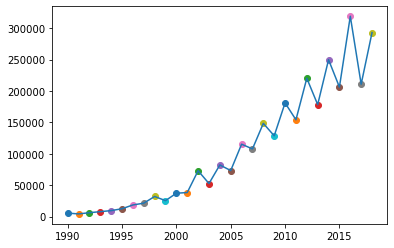

In [9]:
years = get_int_years_event()

prev = 0
asd = []
for y in years:
    
    # change the value of prev to the total number of collaborations in the previous year
    if(y!=1990):
        prev = total_colls_by_year[years.index(int(y)-1)]
        
    # subtract the current total number of collaboration the the precedent one to get the number of new collaborations in the given year
    num_new_collabs = total_colls_by_year[years.index(y)] - prev
    asd.append(num_new_collabs)
    # plot points
    plt.scatter(y,  num_new_collabs, label=str(y) + " -> " + str(num_new_collabs))

#plot the line that connect the points
plt.plot(years, asd)


#### for ACTIVE

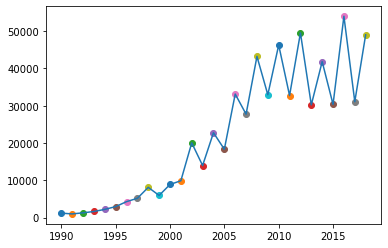

In [10]:
years = get_int_years_event()

prev = 0
asd = []
for y in years:
    
    # change the value of prev to the total number of collaborations in the previous year
    if(y!=1990):
        prev = active_total_colls_by_year[years.index(int(y)-1)]
        
    # subtract the current total number of collaboration the the precedent one to get the number of new collaborations in the given year
    num_new_collabs = active_total_colls_by_year[years.index(y)] - prev
    asd.append(num_new_collabs)
    
    # plot points
    plt.scatter(y,  num_new_collabs, label=str(y) + " -> " + str(num_new_collabs))

#plot the line that connect the points
plt.plot(years, asd)

# investigate zig zag

In [117]:
# for each year is generated a list of all authors that had a new collaboration that year


file = '../myDATA/00-collaboration_df.csv'
collaborations_df = pd.read_csv(file)

groups = [] 
starting_group = collaborations_df[collaborations_df["1990"] != 0]

groups.append(starting_group["ID"].values)

num_colls_by_y = []
for i in range(1, len(YEARS)-1):
    y = YEARS[1:][i]
    prev_y = YEARS[1:][i-1]
    curr_grp = collaborations_df[collaborations_df[y] != collaborations_df[prev_y]]
    groups.append(curr_grp["ID"].values)

# how many authors in the 2011 group are in the 2013 grp? 

In [118]:
grp_2011 = set(groups[YEARS[1:].index("2011")])
grp_2013 = set(groups[YEARS[1:].index("2013")])

print(len(grp_2011.intersection(grp_2013)), "authors with new collab in both 2011 ans 2013")


list(grp_2011.intersection(grp_2013))[10]

8072 authors with new collab in both 2011 ans 2013


6602326045

In [119]:
6602326045 in groups[YEARS[1:].index("2004")]

True

In [120]:

auth = collaborations_df[collaborations_df["ID"] == 6602326045]
for i in auth:
    print(i, auth[i].values )

ID [6602326045]
1990 [0]
1991 [0]
1992 [0]
1993 [0]
1994 [0]
1995 [0]
1996 [0]
1997 [0]
1998 [0]
1999 [1]
2000 [1]
2001 [1]
2002 [1]
2003 [1]
2004 [2]
2005 [2]
2006 [2]
2007 [3]
2008 [3]
2009 [3]
2010 [7]
2011 [10]
2012 [11]
2013 [13]
2014 [34]
2015 [41]
2016 [47]
2017 [50]
2018 [53]
start_year [1999]
end_year [2018]
max_hole_size [3]
activity [19]
tot_pubs [42]


# 2by2 comparison 


In [121]:
for i in range(1990, 2017):
    grp_1 = set(groups[YEARS[1:].index(str(i))])
    grp_2 = set(groups[YEARS[1:].index(str(i+2))])

    common = len(grp_1.intersection(grp_2))
    
    print(common, "/", len(grp_1),
          "("+str(int(common/len(grp_1)*100))+"%)", 
          "\tauthors with a new collaborations in ", 
          str(i)," has also a new colalboration in ", str(i+2))

224 / 1497 (14%) 	authors with a new collaborations in  1990  has also a new colalboration in  1992
217 / 1548 (14%) 	authors with a new collaborations in  1991  has also a new colalboration in  1993
370 / 1979 (18%) 	authors with a new collaborations in  1992  has also a new colalboration in  1994
454 / 2724 (16%) 	authors with a new collaborations in  1993  has also a new colalboration in  1995
644 / 3142 (20%) 	authors with a new collaborations in  1994  has also a new colalboration in  1996
810 / 4024 (20%) 	authors with a new collaborations in  1995  has also a new colalboration in  1997
1084 / 5052 (21%) 	authors with a new collaborations in  1996  has also a new colalboration in  1998
1108 / 6026 (18%) 	authors with a new collaborations in  1997  has also a new colalboration in  1999
1407 / 7166 (19%) 	authors with a new collaborations in  1998  has also a new colalboration in  2000
1368 / 6540 (20%) 	authors with a new collaborations in  1999  has also a new colalboration in  2

: 